In [2]:
# 1) Imports & Settings
import os
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="Set2")
plt.rcParams["figure.figsize"] = (9, 5)

# Paths
PROJECT_ROOT = os.path.abspath("..")  # notebook is in notebooks/, root is one level up
DATA_DIR = os.path.join(PROJECT_ROOT, "data")
REPORTS_DIR = os.path.join(PROJECT_ROOT, "reports")
FIG_DIR = os.path.join(REPORTS_DIR, "figures")

os.makedirs(FIG_DIR, exist_ok=True)

TRAIN_PATH = os.path.join(DATA_DIR, "train.csv")
print("Data path:", TRAIN_PATH)


Data path: D:\Road to Ace\titanic-eda\data\train.csv


In [4]:
# 2) Load Data & First Look
df = pd.read_csv(TRAIN_PATH)
print("Shape:", df.shape)
display(df.head())
df.info()
display(df.describe(numeric_only=True))
display(df.describe())


# Missing values overview
missing = df.isna().sum().sort_values(ascending=False)
display(missing.to_frame("missing_count"))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missingness Heatmap")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "01_missingness_heatmap.png"), dpi=150)
plt.show()


Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


TypeError: NDFrame.describe() got an unexpected keyword argument 'numeric_only'

Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,missing_count
Cabin,687
Age,177
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0


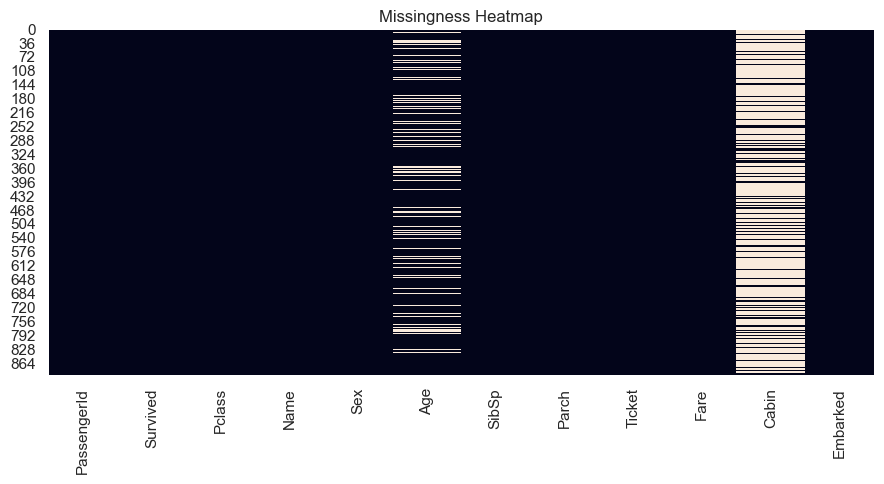

In [3]:
# 2) Load Data & First Look
df = pd.read_csv(TRAIN_PATH)
print("Shape:", df.shape)
display(df.head())
df.info()

# Describe (cross-version safe)
try:
    display(df.describe(numeric_only=True))
except TypeError:
    display(df.select_dtypes(include='number').describe())

# Missing values overview
missing = df.isna().sum().sort_values(ascending=False)
display(missing.to_frame("missing_count"))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missingness Heatmap")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "01_missingness_heatmap.png"), dpi=150)
plt.show()


In [4]:
# 3) Cleaning
df_clean = df.copy()

# Drop high-missing column for EDA simplicity
if "Cabin" in df_clean.columns:
    df_clean.drop(columns=["Cabin"], inplace=True)

# Embarked: fill with mode
if df_clean["Embarked"].isna().sum() > 0:
    embarked_mode = df_clean["Embarked"].mode()[0]
    df_clean["Embarked"].fillna(embarked_mode, inplace=True)

# Fare: fill with median
if df_clean["Fare"].isna().sum() > 0:
    fare_median = df_clean["Fare"].median()
    df_clean["Fare"].fillna(fare_median, inplace=True)

# Age: fill by group median (Sex, Pclass)
age_group_median = df_clean.groupby(["Sex", "Pclass"])["Age"].transform("median")
df_clean["Age"] = df_clean["Age"].fillna(age_group_median)
# If any Age still null, fallback to global median
df_clean["Age"].fillna(df_clean["Age"].median(), inplace=True)

# Cast types (categoricals)
for col in ["Survived", "Pclass", "Sex", "Embarked"]:
    if col in df_clean.columns:
        if col in ["Survived", "Pclass"]:
            df_clean[col] = df_clean[col].astype("category")
        else:
            df_clean[col] = df_clean[col].astype("category")

display(df_clean.head())
df_clean.info()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(2), int64(3), object(2)
memory usage: 52.8+ KB


In [5]:
# 4) Feature Helpers
df_clean["FamilySize"] = df_clean["SibSp"] + df_clean["Parch"] + 1
df_clean["IsAlone"] = (df_clean["FamilySize"] == 1).astype(int)

# Age bins (you can tweak)
df_clean["AgeBin"] = pd.cut(
    df_clean["Age"],
    bins=[0, 12, 18, 35, 50, 80],
    labels=["Child", "Teen", "YoungAdult", "Adult", "Senior"],
    include_lowest=True
)

# Quick check
display(df_clean[["Age", "AgeBin", "FamilySize", "IsAlone"]].head())


,Age,AgeBin,FamilySize,IsAlone
0,22.0,YoungAdult,2,0
1,38.0,Adult,2,0
2,26.0,YoungAdult,1,1
3,35.0,YoungAdult,2,0
4,35.0,YoungAdult,1,1


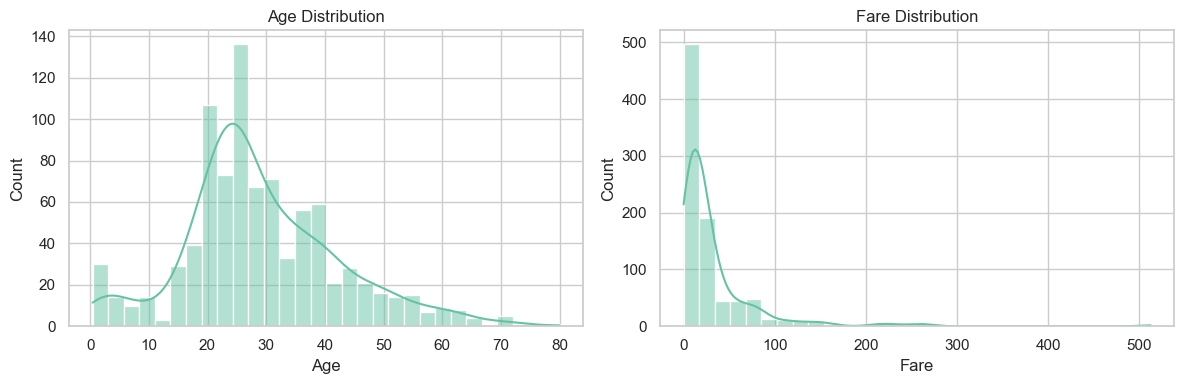

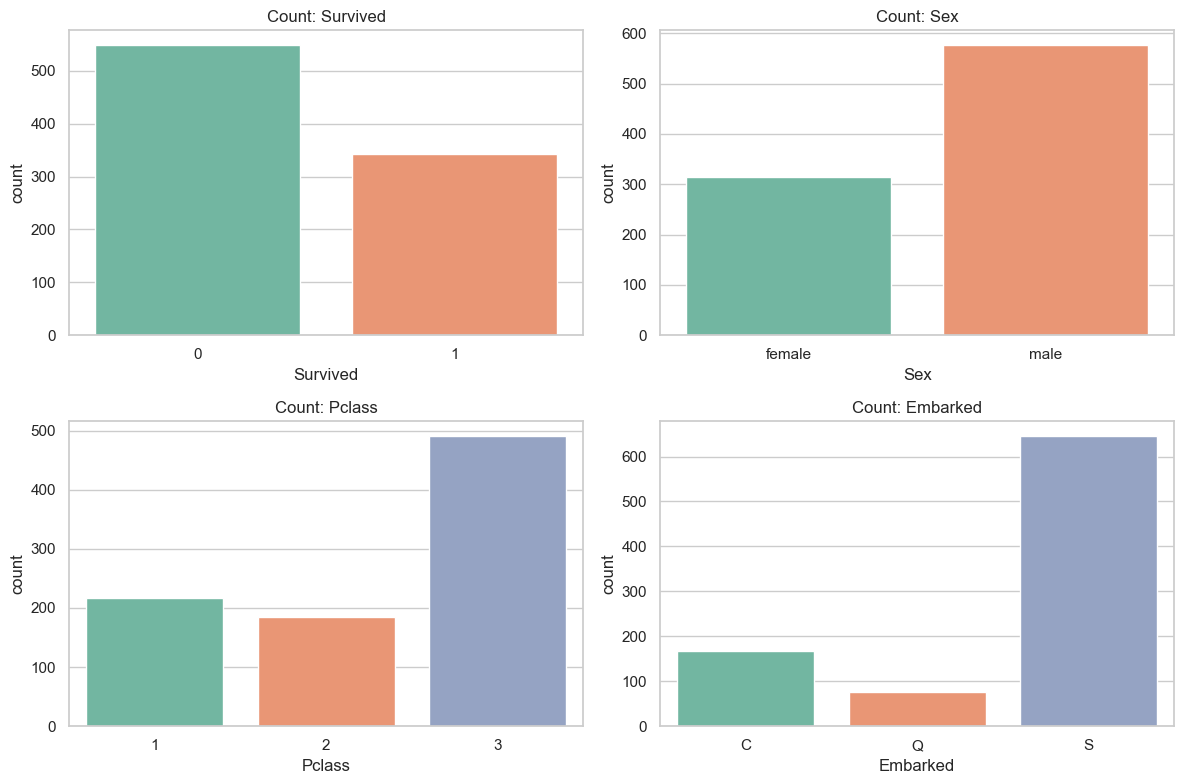

In [6]:
# 5) Univariate Distributions

fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.histplot(df_clean["Age"], kde=True, ax=axes[0], bins=30)
axes[0].set_title("Age Distribution")

sns.histplot(df_clean["Fare"], kde=True, ax=axes[1], bins=30)
axes[1].set_title("Fare Distribution")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "02_univariate_age_fare.png"), dpi=150)
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12,8))
sns.countplot(x="Survived", data=df_clean, ax=axes[0,0])
axes[0,0].set_title("Count: Survived")

sns.countplot(x="Sex", data=df_clean, ax=axes[0,1])
axes[0,1].set_title("Count: Sex")

sns.countplot(x="Pclass", data=df_clean, ax=axes[1,0])
axes[1,0].set_title("Count: Pclass")

sns.countplot(x="Embarked", data=df_clean, ax=axes[1,1])
axes[1,1].set_title("Count: Embarked")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "03_univariate_counts.png"), dpi=150)
plt.show()


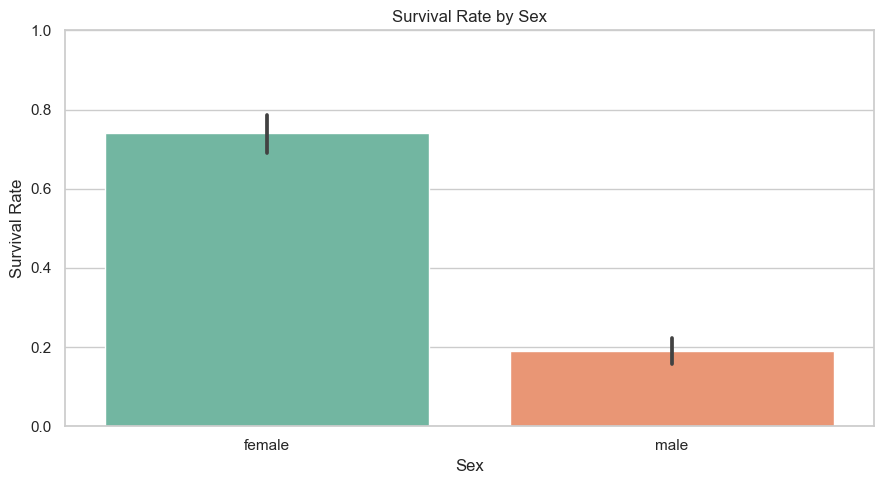

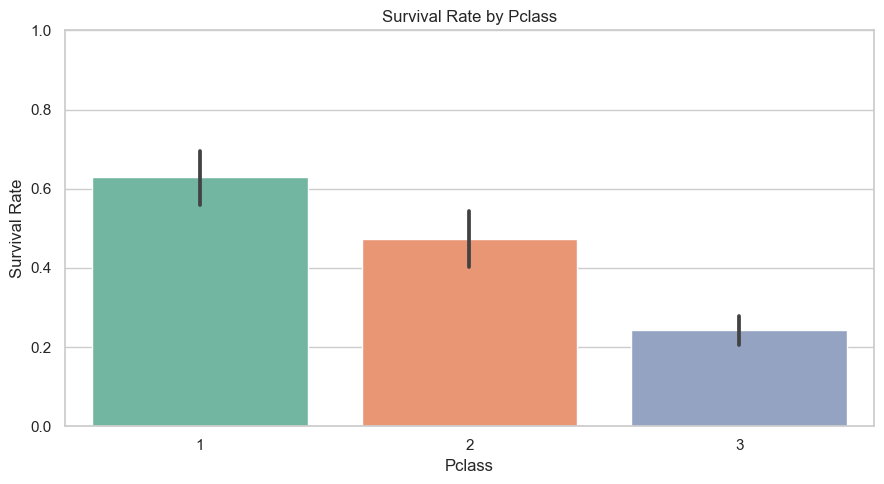

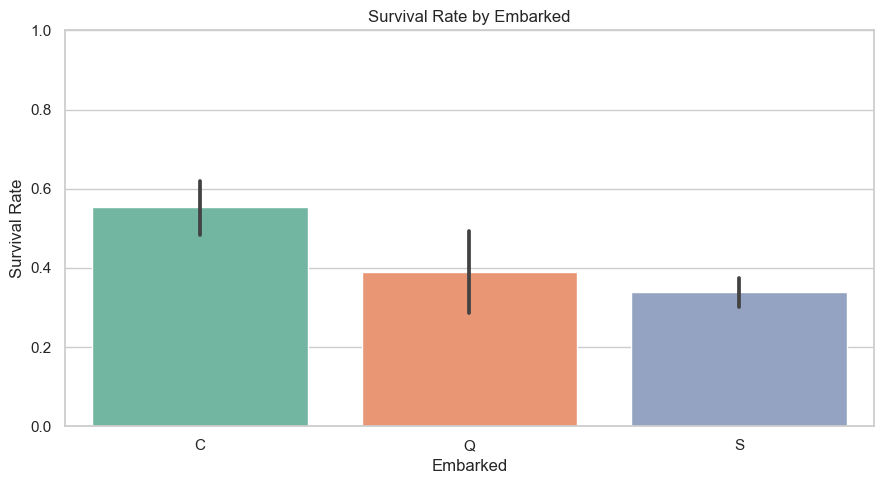

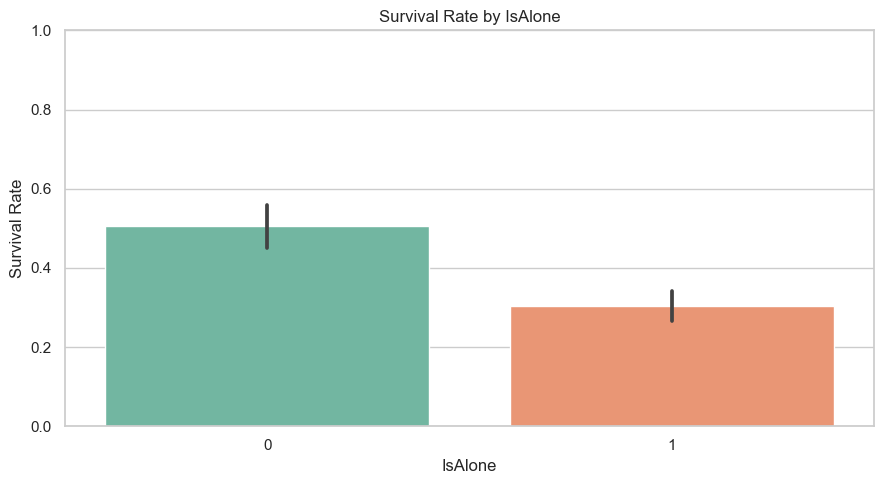

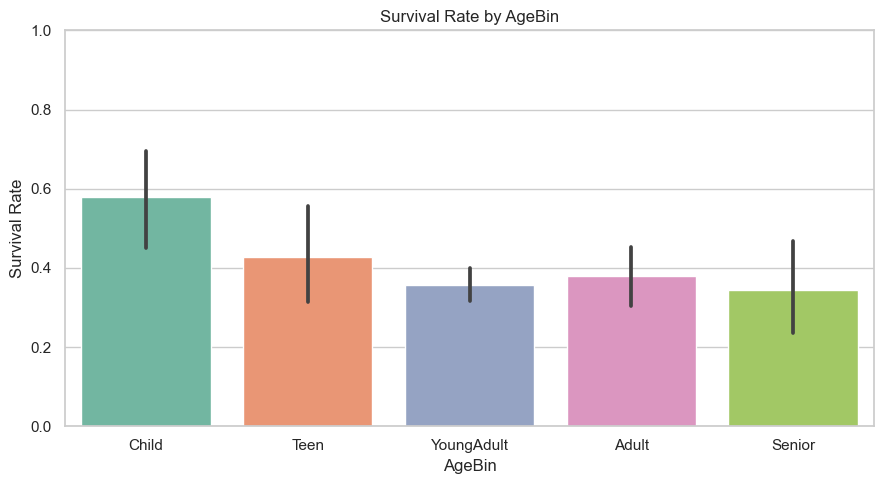

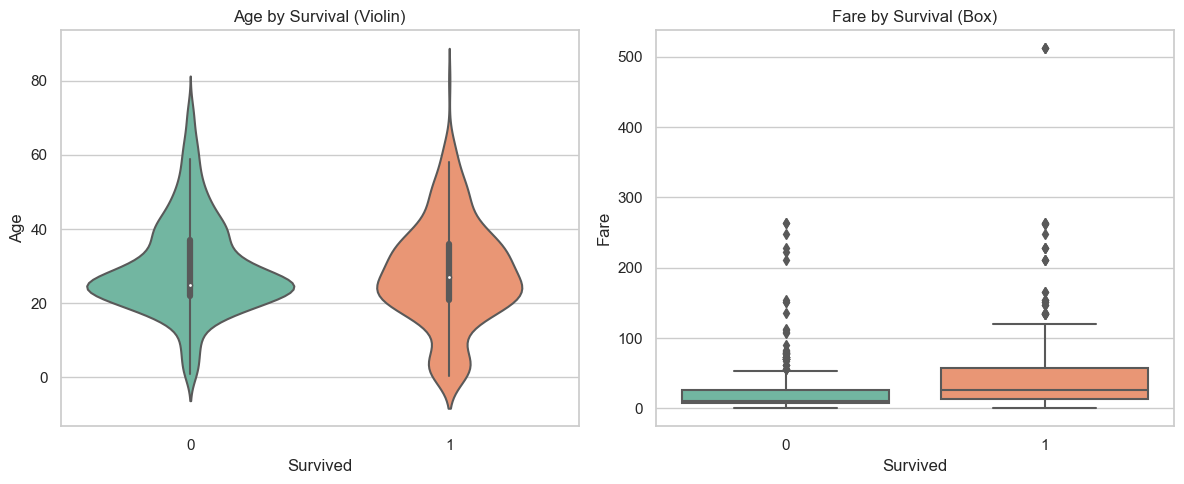

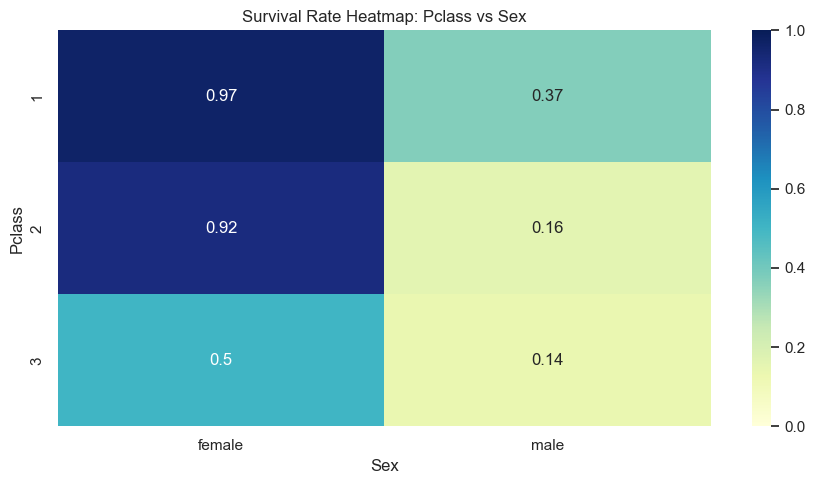

In [7]:
# 6) Bivariate: Survival Rate by Category

def plot_survival_rate(df_, col, order=None, rotation=0, figsize=(7,4), save_name=None):
    """Bar plot of mean Survived grouped by a categorical column."""
    ax = sns.barplot(x=col, y="Survived", data=df_, estimator=np.mean, order=order, ci=95)
    ax.set_ylabel("Survival Rate")
    ax.set_title(f"Survival Rate by {col}")
    plt.xticks(rotation=rotation)
    plt.ylim(0, 1)
    plt.tight_layout()
    if save_name:
        plt.savefig(os.path.join(FIG_DIR, save_name), dpi=150)
    plt.show()

# Ensure Survived is numeric for mean calculation
df_rate = df_clean.copy()
df_rate["Survived"] = df_rate["Survived"].astype(int)

plot_survival_rate(df_rate, "Sex", save_name="04_survival_by_sex.png")
plot_survival_rate(df_rate, "Pclass", order=sorted(df_rate["Pclass"].cat.categories, key=int), save_name="05_survival_by_pclass.png")
plot_survival_rate(df_rate, "Embarked", save_name="06_survival_by_embarked.png")
plot_survival_rate(df_rate, "IsAlone", save_name="07_survival_by_isalone.png")
plot_survival_rate(df_rate, "AgeBin", save_name="08_survival_by_agebin.png")

# Violin/Box for numeric vs Survived
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.violinplot(x="Survived", y="Age", data=df_rate, ax=axes[0])
axes[0].set_title("Age by Survival (Violin)")
sns.boxplot(x="Survived", y="Fare", data=df_rate, ax=axes[1])
axes[1].set_title("Fare by Survival (Box)")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "09_violin_age_box_fare.png"), dpi=150)
plt.show()

# Crosstab heatmap example: Pclass vs Sex
ct = pd.crosstab(df_rate["Pclass"], df_rate["Sex"], values=df_rate["Survived"], aggfunc="mean")
sns.heatmap(ct, annot=True, cmap="YlGnBu", vmin=0, vmax=1)
plt.title("Survival Rate Heatmap: Pclass vs Sex")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "10_heatmap_pclass_sex.png"), dpi=150)
plt.show()


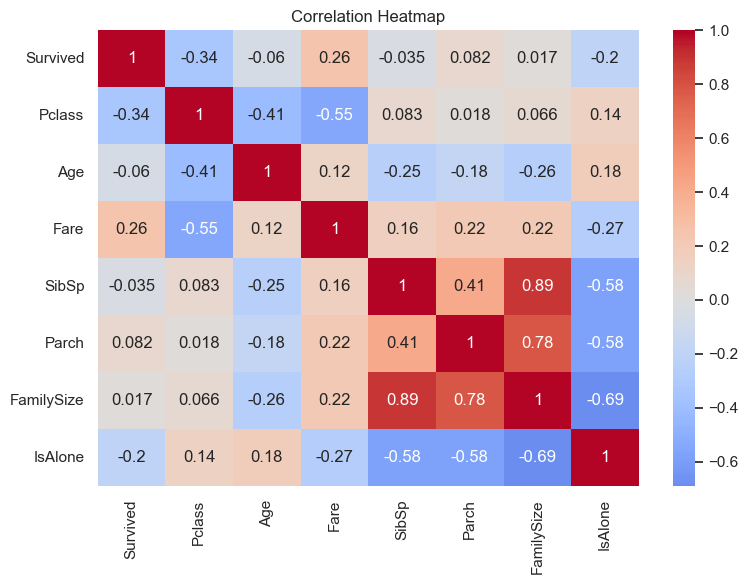

In [8]:
# 7) Multivariate: Correlations
num_cols = ["Survived", "Pclass", "Age", "Fare", "SibSp", "Parch", "FamilySize", "IsAlone"]
corr = df_rate[num_cols].apply(pd.to_numeric, errors="coerce").corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig(os.path.join(FIG_DIR, "11_correlation_heatmap.png"), dpi=150)
plt.show()


In [9]:
# 8) Programmatic Insights
overall = df_rate["Survived"].mean()

by_sex = df_rate.groupby("Sex")["Survived"].mean().sort_values(ascending=False)
by_pclass = df_rate.groupby("Pclass")["Survived"].mean().sort_values(ascending=False)
by_embarked = df_rate.groupby("Embarked")["Survived"].mean().sort_values(ascending=False)

# Combined Sex x Pclass
combined = df_rate.groupby(["Sex", "Pclass"])["Survived"].mean().sort_values(ascending=False)

print(f"Overall survival rate: {overall:.2%}\n")
print("By Sex:")
print((by_sex*100).round(1).astype(str) + "%")
print("\nBy Pclass:")
print((by_pclass*100).round(1).astype(str) + "%")
print("\nBy Embarked:")
print((by_embarked*100).round(1).astype(str) + "%")
print("\nBy Sex × Pclass:")
print((combined*100).round(1).astype(str) + "%")


Overall survival rate: 38.38%

By Sex:
Sex
female    74.2%
male      18.9%
Name: Survived, dtype: object

By Pclass:
Pclass
1    63.0%
2    47.3%
3    24.2%
Name: Survived, dtype: object

By Embarked:
Embarked
C    55.4%
Q    39.0%
S    33.9%
Name: Survived, dtype: object

By Sex × Pclass:
Sex     Pclass
female  1         96.8%
        2         92.1%
        3         50.0%
male    1         36.9%
        2         15.7%
        3         13.5%
Name: Survived, dtype: object


In [10]:
# 9) Export Cleaned Data
CLEAN_PATH = os.path.join(DATA_DIR, "train_cleaned.csv")
df_clean.to_csv(CLEAN_PATH, index=False)
print("Saved cleaned dataset to:", CLEAN_PATH)


Saved cleaned dataset to: D:\Road to Ace\titanic-eda\data\train_cleaned.csv


SyntaxError: invalid syntax (1780235801.py, line 1)